In [108]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 

In [37]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})

In [15]:
df['data1'].groupby(df['key1']).mean()

key1
a   -0.179190
b    0.063256
Name: data1, dtype: float64

In [16]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.277023
      two     0.016478
b     one    -0.627939
      two     0.754450
Name: data1, dtype: float64

In [17]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [18]:
df['data1'].groupby([states, years]).mean()

California  2005    0.016478
            2006   -0.627939
Ohio        2005    0.493007
            2006   -0.785611
Name: data1, dtype: float64

In [19]:
df.groupby('key1').mean()

,data1,date2
key1,,
a,-0.179190,-0.195022
b,0.063256,-0.198324


In [20]:
df.groupby(['key1', 'key2']).mean()

data1     date2
key1 key2                    
a    one  -0.277023 -0.724772
     two   0.016478  0.864478
b    one  -0.627939  0.061281
     two   0.754450 -0.457930

In [21]:
grouped2 = df.groupby(['key1', 'key2'])
grouped2.size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [25]:
for name, group in grouped2:
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     date2
0    a  one  0.231564  0.223008
4    a  one -0.785611 -1.672552
('a', 'two')
  key1 key2     data1     date2
1    a  two  0.016478  0.864478
('b', 'one')
  key1 key2     data1     date2
2    b  one -0.627939  0.061281
('b', 'two')
  key1 key2    data1    date2
3    b  two  0.75445 -0.45793


In [26]:
pieces = dict(list(grouped))

In [28]:
pieces['b']

2   -0.627939
3    0.754450
Name: data1, dtype: float64

In [29]:
df.dtypes

key1      object
key2      object
data1    float64
date2    float64
dtype: object

In [30]:
grouped3 = df.groupby(df.dtypes, axis=1)

In [31]:
for name, group in grouped3:
    print(name)
    print(group)

float64
      data1     date2
0  0.231564  0.223008
1  0.016478  0.864478
2 -0.627939  0.061281
3  0.754450 -0.457930
4 -0.785611 -1.672552
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [47]:
s1 = df.groupby('key1')[['data1', 'data2']]
s2 = df[['data1', 'data2']].groupby(df['key1'])

In [48]:
def printGroup(grouped):
    for name, group in grouped:
        print(name)
        print(group)

In [49]:
printGroup(s1)

a
  key1 key2     data1     data2
0    a  one -0.406182  0.903845
1    a  two  0.236861  0.896681
4    a  one  0.360658 -0.448457
b
  key1 key2     data1     data2
2    b  one  0.961967 -1.872442
3    b  two -0.268991 -0.737802


In [50]:
printGroup(s2)

a
      data1     data2
0 -0.406182  0.903845
1  0.236861  0.896681
4  0.360658 -0.448457
b
      data1     data2
2  0.961967 -1.872442
3 -0.268991 -0.737802


In [51]:
df[['data1', 'data2']].groupby(df['data1'])

In [55]:
df['data1'].groupby(df['key1'])

In [56]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.227694
     two   0.896681
b    one  -1.872442
     two  -0.737802

In [57]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one     0.227694
      two     0.896681
b     one    -1.872442
      two    -0.737802
Name: data2, dtype: float64

In [58]:
t = df.groupby(['key1', 'key2'])['data2']

In [60]:
t.mean()

key1  key2
a     one     0.227694
      two     0.896681
b     one    -1.872442
      two    -0.737802
Name: data2, dtype: float64

In [63]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan

In [64]:
people

,a,b,c,d,e
Joe,-1.018857,1.324428,1.828935,-0.928657,0.024219
Steve,1.741092,0.382895,0.149021,-0.562573,0.639205
Wes,-1.622563,NaN,NaN,0.000514,0.272906
Jim,-1.596093,-0.596586,1.007329,0.595876,-0.632041
Travis,-1.179062,-0.895942,0.071323,0.589211,-0.890169


In [65]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [67]:
by_column = people.groupby(mapping, axis=1)

In [69]:
by_column.sum()

,blue,red
Joe,0.900278,0.329790
Steve,-0.413552,2.763192
Wes,0.000514,-1.349657
Jim,1.603205,-2.824720
Travis,0.660534,-2.965172


In [71]:
map_series = Series(mapping)
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [73]:
people.groupby(len).sum()

,a,b,c,d,e
3,-4.237513,0.727842,2.836264,-0.332268,-0.334915
5,1.741092,0.382895,0.149021,-0.562573,0.639205
6,-1.179062,-0.895942,0.071323,0.589211,-0.890169


In [75]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).count()

a  b  c  d  e
3 one  2  1  1  2  2
  two  1  1  1  1  1
5 one  1  1  1  1  1
6 two  1  1  1  1  1

In [78]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [79]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.506547 -1.570539  1.127282  1.808613 -1.996219
1     -0.168259  1.353937 -0.072938 -0.755411  1.396744
2     -1.462273 -0.573383  0.720889  1.258673 -0.041119
3      0.723464  0.008426 -0.275571 -1.637293  1.246688

In [81]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [83]:
df.groupby('key1').quantile(0.9)

0.9,data1,data2
key1,,
a,0.335898,0.902412
b,0.838871,-0.851266


In [87]:
grouped = df.groupby(['key1'])

In [88]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.766840,1.352302
b,1.230958,1.134639


In [86]:

def peak_to_peak1(arr):
    return [arr.max(), arr.min()]
grouped.agg(peak_to_peak1)

,key2,data1,data2
key1,,,
a,"[two, one]","[0.36065780895031296, -0.40618195214476627]","[0.9038452669445447, -0.44845718072126034]"
b,"[two, one]","[0.961967006137603, -0.2689910543622136]","[-0.7378021272941893, -1.8724415810305701]"


In [89]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.063779  0.411678 -0.406182 -0.084660  0.236861  0.298760   
b      2.0  0.346488  0.870419 -0.268991  0.038748  0.346488  0.654227   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.360658   3.0  0.450690  0.778692 -0.448457  0.224112  0.896681   
b     0.961967   2.0 -1.305122  0.802311 -1.872442 -1.588782 -1.305122   

                          
           75%       max  
key1                      
a     0.900263  0.903845  
b    -1.021462 -0.737802

In [90]:
tips = pd.read_csv('examples/tips.csv')

In [93]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [94]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [95]:
grouped = tips.groupby(['day', 'smoker'])

In [96]:
grouped_pct = grouped['tip_pct']

In [98]:
grouped_pct.mean()

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [100]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [101]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [102]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [106]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

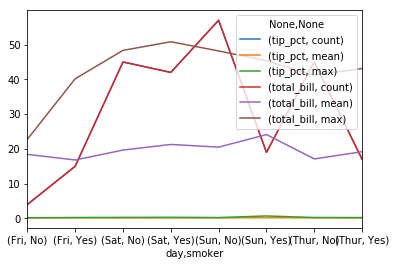

In [109]:
result.plot()

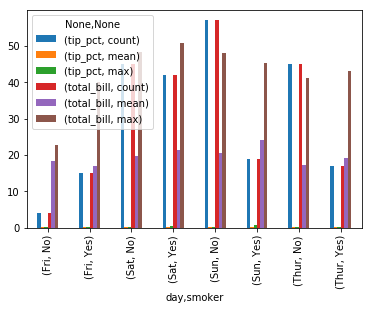

In [110]:
result.plot.bar()

In [111]:
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [112]:
grouped.agg({'tip_pct': ['min', 'max'], 'size': 'sum'})

tip_pct           size
                  min       max  sum
day  smoker                         
Fri  No      0.120385  0.187735    9
     Yes     0.103555  0.263480   31
Sat  No      0.056797  0.291990  115
     Yes     0.035638  0.325733  104
Sun  No      0.059447  0.252672  167
     Yes     0.065660  0.710345   49
Thur No      0.072961  0.266312  112
     Yes     0.090014  0.241255   40

In [114]:
grouped.agg([('name', 'sum')])

total_bill     tip  \
                  name    name   
day  smoker                      
Fri  No          73.68   11.25   
     Yes        252.20   40.71   
Sat  No         884.78  139.63   
     Yes        893.62  120.77   
Sun  No        1168.88  180.57   
     Yes        458.28   66.82   
Thur No         770.09  120.32   
     Yes        326.24   51.51   

                                                          time size   tip_pct  
                                                          name name      name  
day  smoker                                                                    
Fri  No                                DinnerDinnerDinnerLunch    9  0.606602  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   31  2.621746  
Sat  No      DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  115  7.112145  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  104  6.212055  
Sun  No      DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  167  9.126438  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   49  3.557756  
Thur No      LunchLunchLunchLunchLunchLunchLunchLunchLunchL...  112  7.213414  
     Yes     LunchLunchLunchLunchLunchLunchLunchLunchLunchL...   40  2.785676

In [116]:
grouped.agg(['sum'])

total_bill     tip  \
                   sum     sum   
day  smoker                      
Fri  No          73.68   11.25   
     Yes        252.20   40.71   
Sat  No         884.78  139.63   
     Yes        893.62  120.77   
Sun  No        1168.88  180.57   
     Yes        458.28   66.82   
Thur No         770.09  120.32   
     Yes        326.24   51.51   

                                                          time size   tip_pct  
                                                           sum  sum       sum  
day  smoker                                                                    
Fri  No                                DinnerDinnerDinnerLunch    9  0.606602  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   31  2.621746  
Sat  No      DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  115  7.112145  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  104  6.212055  
Sun  No      DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...  167  9.126438  
     Yes     DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...   49  3.557756  
Thur No      LunchLunchLunchLunchLunchLunchLunchLunchLunchL...  112  7.213414  
     Yes     LunchLunchLunchLunchLunchLunchLunchLunchLunchL...   40  2.785676

In [119]:
grouped.agg({'tip': [('n1', 'max'), ('n2', 'min')], 'size': 'sum'})

tip       size
                n1    n2  sum
day  smoker                  
Fri  No       3.50  1.50    9
     Yes      4.73  1.00   31
Sat  No       9.00  1.00  115
     Yes     10.00  1.00  104
Sun  No       6.00  1.01  167
     Yes      6.50  1.50   49
Thur No       6.70  1.25  112
     Yes      5.00  2.00   40

In [120]:
grouped.agg({'tip': [('n1', 'max'), 'min'], 'size': 'sum'})

tip       size
                n1   min  sum
day  smoker                  
Fri  No       3.50  1.50    9
     Yes      4.73  1.00   31
Sat  No       9.00  1.00  115
     Yes     10.00  1.00  104
Sun  No       6.00  1.01  167
     Yes      6.50  1.50   49
Thur No       6.70  1.25  112
     Yes      5.00  2.00   40

In [121]:
grouped.mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [123]:
t = tips.groupby(['day', 'smoker'], as_index=False).mean()
t

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


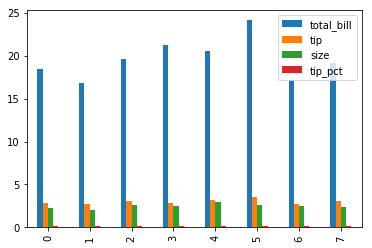

In [124]:
t.plot.bar()

In [128]:
tips.sort_values(by='tip_pct')[-5:]

,total_bill,tip,smoker,day,time,size,tip_pct
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [129]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [134]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [141]:
top(tips[tips['smoker'] == 'Yes'])

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [144]:
tips.groupby('smoker').mean()

,total_bill,tip,size,tip_pct
smoker,,,,
No,19.188278,2.991854,2.668874,0.159328
Yes,20.756344,3.008710,2.408602,0.163196


In [146]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [148]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [173]:
tips.groupby('smoker').describe()

total_bill                                                           \
            count       mean       std   min     25%    50%     75%    max   
smoker                                                                       
No          151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33   
Yes          93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81   

          tip            ... size      tip_pct                                \
        count      mean  ...  75%  max   count      mean       std       min   
smoker                   ...                                                   
No      151.0  2.991854  ...  3.0  6.0   151.0  0.159328  0.039910  0.056797   
Yes      93.0  3.008710  ...  3.0  5.0    93.0  0.163196  0.085119  0.035638   

                                                
             25%       50%       75%       max  
smoker                                          
No      0.136906  0.155625  0.185014  0.291990  
Yes     0.106771  0.153846  0.195059  0.710345  

[2 rows x 32 columns]

In [174]:
tips.groupby('smoker').max()

,total_bill,tip,day,time,size,tip_pct
smoker,,,,,,
No,48.33,9.0,Thur,Lunch,6,0.291990
Yes,50.81,10.0,Thur,Lunch,5,0.710345


In [176]:
g = tips.groupby('smoker')

In [177]:
g.max()

,total_bill,tip,day,time,size,tip_pct
smoker,,,,,,
No,48.33,9.0,Thur,Lunch,6,0.291990
Yes,50.81,10.0,Thur,Lunch,5,0.710345


In [178]:
f = lambda x: x.max()
g.apply(f)

,total_bill,tip,day,time,size,tip_pct
smoker,,,,,,
No,48.33,9.0,Thur,Lunch,6,0.291990
Yes,50.81,10.0,Thur,Lunch,5,0.710345


In [180]:
g.agg('max')

,total_bill,tip,day,time,size,tip_pct
smoker,,,,,,
No,48.33,9.0,Thur,Lunch,6,0.291990
Yes,50.81,10.0,Thur,Lunch,5,0.710345


In [181]:
g.agg(max)

,total_bill,tip,day,time,size,tip_pct
smoker,,,,,,
No,48.33,9.0,Thur,Lunch,6,0.291990
Yes,50.81,10.0,Thur,Lunch,5,0.710345


In [182]:
g.agg([max, min])

total_bill         tip        day        time         size      \
              max   min   max  min   max  min    max     min  max min   
smoker                                                                  
No          48.33  7.25   9.0  1.0  Thur  Fri  Lunch  Dinner    6   1   
Yes         50.81  3.07  10.0  1.0  Thur  Fri  Lunch  Dinner    5   1   

         tip_pct            
             max       min  
smoker                      
No      0.291990  0.056797  
Yes     0.710345  0.035638

In [183]:
f = lambda x: [x.max(), x.min()]
g.apply(f)

smoker
No     [[48.33, 9.0, Thur, Lunch, 6, 0.29198966408268...
Yes    [[50.81, 10.0, Thur, Lunch, 5, 0.7103448275862...
dtype: object

In [185]:
tips.agg([max, min]).

,total_bill,tip,smoker,day,time,size,tip_pct
max,50.81,10.0,Yes,Thur,Lunch,6,0.710345
min,3.07,1.0,No,Fri,Dinner,1,0.035638


In [187]:
f = lambda x: x.agg([max, min])
t = g.apply(f)
t.unstack(1)

total_bill         tip        day        time         size      \
              max   min   max  min   max  min    max     min  max min   
smoker                                                                  
No          48.33  7.25   9.0  1.0  Thur  Fri  Lunch  Dinner    6   1   
Yes         50.81  3.07  10.0  1.0  Thur  Fri  Lunch  Dinner    5   1   

         tip_pct            
             max       min  
smoker                      
No      0.291990  0.056797  
Yes     0.710345  0.035638

In [188]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [191]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)

In [192]:
quartiles[:10]

0    (-1.73, 0.0469]
1    (-1.73, 0.0469]
2    (0.0469, 1.824]
3    (0.0469, 1.824]
4    (-1.73, 0.0469]
5    (0.0469, 1.824]
6    (-1.73, 0.0469]
7    (0.0469, 1.824]
8    (0.0469, 1.824]
9    (0.0469, 1.824]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.515, -1.73] < (-1.73, 0.0469] < (0.0469, 1.824] < (1.824, 3.601]]

In [196]:
def get_stats(group):
    return group.describe()
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
"(-3.515, -1.73]",46.0,0.182189,1.162175,-2.675502,-0.481755,0.155130,0.677044,3.525798
"(-1.73, 0.0469]",486.0,0.028495,0.932788,-3.104948,-0.652040,0.005876,0.654911,3.078115
"(0.0469, 1.824]",431.0,-0.022696,0.990051,-3.635825,-0.680267,0.034730,0.642112,2.325482
"(1.824, 3.601]",37.0,0.275065,0.986026,-2.291764,-0.163471,0.359334,0.839014,2.017283


In [199]:
quartiles1 = pd.qcut(frame.data1, 10, labels = False)
grouped = frame.data2.groupby(quartiles1)
grouped.apply(get_stats).unstack()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
0,100.0,0.085505,1.007633,-2.675502,-0.590439,0.056224,0.654584,3.525798
1,100.0,0.041790,0.998217,-1.731980,-0.778683,-0.001674,0.629269,3.078115
2,100.0,0.082247,0.891343,-2.356960,-0.407301,0.149373,0.686326,2.481257
3,100.0,-0.024579,1.032345,-2.289787,-0.786859,-0.060903,0.667497,2.267410
4,100.0,-0.026950,0.873379,-3.104948,-0.556766,-0.101902,0.594072,2.489891
5,100.0,-0.020073,0.960695,-2.371399,-0.707235,0.023164,0.623037,2.236817
6,100.0,-0.138456,1.001413,-3.635825,-0.730992,-0.045736,0.445936,1.595352
7,100.0,0.096238,1.025703,-2.979159,-0.502526,0.254565,0.851410,2.030009
8,100.0,0.028893,0.997937,-2.675160,-0.511520,0.022518,0.618695,2.325482


In [200]:
quartiles1 = pd.qcut(frame.data1, 10, labels = False)
grouped = frame.data2.groupby(quartiles1)
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
data1,,,,,,,,
0,100.0,0.085505,1.007633,-2.675502,-0.590439,0.056224,0.654584,3.525798
1,100.0,0.041790,0.998217,-1.731980,-0.778683,-0.001674,0.629269,3.078115
2,100.0,0.082247,0.891343,-2.356960,-0.407301,0.149373,0.686326,2.481257
3,100.0,-0.024579,1.032345,-2.289787,-0.786859,-0.060903,0.667497,2.267410
4,100.0,-0.026950,0.873379,-3.104948,-0.556766,-0.101902,0.594072,2.489891
5,100.0,-0.020073,0.960695,-2.371399,-0.707235,0.023164,0.623037,2.236817
6,100.0,-0.138456,1.001413,-3.635825,-0.730992,-0.045736,0.445936,1.595352
7,100.0,0.096238,1.025703,-2.979159,-0.502526,0.254565,0.851410,2.030009
8,100.0,0.028893,0.997937,-2.675160,-0.511520,0.022518,0.618695,2.325482


In [201]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.093733
2         NaN
3   -0.854345
4         NaN
5    1.234592
dtype: float64

In [202]:
s.fillna(s.mean())

0    0.095505
1   -0.093733
2    0.095505
3   -0.854345
4    0.095505
5    1.234592
dtype: float64

In [204]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          1.082485
New York      0.866541
Vermont            NaN
Florida       0.096442
Oregon       -0.967892
Nevada             NaN
California    1.040960
Idaho              NaN
dtype: float64

In [205]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.082485
New York      0.866541
Vermont       0.681823
Florida       0.096442
Oregon       -0.967892
Nevada        0.036534
California    1.040960
Idaho         0.036534
dtype: float64

In [206]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          1.082485
New York      0.866541
Vermont       0.500000
Florida       0.096442
Oregon       -0.967892
Nevada       -1.000000
California    1.040960
Idaho        -1.000000
dtype: float64

In [208]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)

In [209]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

6S     6
7C     7
4H     4
3C     3
JD    10
dtype: int64

In [211]:
f = lambda card: card[-1]
deck.groupby(f).apply(draw, n=2)

C  3C      3
   5C      5
D  2D      2
   QD     10
H  2H      2
   9H      9
S  10S    10
   JS     10
dtype: int64

In [212]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-1.262792,0.822472
1,a,-1.193911,0.581964
2,a,0.413995,0.239974
3,a,0.571666,0.381588
4,b,-1.284017,0.270851
5,b,-1.357536,0.588059
6,b,0.844465,0.727706
7,b,-0.334710,0.408448


In [215]:
f = lambda g: np.average(g.data, weights=g.weights)
df.groupby('category').apply(f)

category
a   -0.698883
b   -0.334966
dtype: float64

In [217]:
close_px = pd.read_csv('examples/stock_px_2.csv', 
                       parse_dates=True, index_col=0)
# close_px.info()
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [220]:
spx_corr = lambda x: x.corrwith(x['SPX'])
get_year = lambda x: x.year
rets = close_px.pct_change().dropna()
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [221]:
by_year.apply(lambda g: g['AAPL'].corr(g.MSFT))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [224]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [226]:
tips.pivot_table?

In [227]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [236]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')
# r = tips.groupby(['time', 'day', 'smoker'])[['size', 'tip_pct']].agg('mean')
# r.unstack()

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [229]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], 
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [231]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], aggfunc=[len, max])
# tips.groupby(['time', 'smoker'])['tip_pct'].agg([len, max])

len       max
              tip_pct   tip_pct
time   smoker                  
Dinner No       106.0  0.291990
       Yes       70.0  0.710345
Lunch  No        45.0  0.266312
       Yes       23.0  0.259314

In [238]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'], 
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

In [253]:
nationality = Series(['USA', 'Japan'] * 10)
hand = Series(['Right', 'Left'] * 10)
data = DataFrame({'Sample': np.arange(1, 11), 
                  'Nationality': list(nationality.sample(10)),
                  'Handedness': list(hand.sample(10))})

In [254]:
data

,Sample,Nationality,Handedness
0,1,USA,Right
1,2,Japan,Left
2,3,Japan,Left
3,4,USA,Left
4,5,Japan,Right
5,6,USA,Right
6,7,Japan,Left
7,8,Japan,Left
8,9,Japan,Right
9,10,USA,Right


In [255]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left,Right,All
Nationality,,,
Japan,4,2,6
USA,1,3,4
All,5,5,10


In [262]:
data.pivot_table([], index='Nationality', columns='Handedness', 
                 aggfunc=len, margins=True)

Handedness,Left,Right,All
Nationality,,,
Japan,4,2,6
USA,1,3,4
All,5,5,10


In [263]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240
6,8.77,2.00,No,Sun,Dinner,2,0.228050
7,26.88,3.12,No,Sun,Dinner,4,0.116071
8,15.04,1.96,No,Sun,Dinner,2,0.130319
9,14.78,3.23,No,Sun,Dinner,2,0.218539
